# Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing file

In [3]:
df = pd.read_csv('Economic.csv')

In [4]:
df.head()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
0,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,80000000.0,313107,228,44,11,380000,405,534,134
1,2013,2,1878731,2587,0.645,165.50,324295,0.060,0.629,557,360700000.0,885681,809,50,10,359500,332,196,13
2,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,10550000.0,106386,128,6,6,400000,479,12,0
3,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,150000000.0,350000,254,14,8,403000,558,91,24
4,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,222200000.0,457374,402,12,4,425500,809,63,0


In [5]:
df.describe()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
count,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2016.000000,6.500000,3.015647e+06,3940.511905,0.817738,244.423929,355989.202381,0.040429,0.646000,468.952381,4.804817e+08,9.925375e+05,801.726190,13.226190,3.773810,167327.845238,269.607143,132.892857,23.130952
std,2.012012,3.472786,5.492766e+05,694.479496,0.108631,49.763225,20682.654613,0.012743,0.013696,455.771606,5.415084e+08,9.512743e+05,795.160124,18.473264,4.934148,221099.042608,496.684817,216.830344,45.644720
min,2013.000000,1.000000,1.878731e+06,2587.000000,0.572000,157.890000,322957.000000,0.020000,0.626000,-54.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,3.750000,2.604905e+06,3408.000000,0.768500,187.367500,341119.000000,0.030750,0.634000,134.750000,1.125000e+08,3.460152e+05,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,6.500000,3.018654e+06,3960.500000,0.877500,250.280000,352823.000000,0.038000,0.643500,327.000000,2.834794e+08,6.841545e+05,557.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,9.250000,3.413058e+06,4516.250000,0.901250,287.050000,370464.000000,0.050000,0.656250,645.000000,6.434358e+08,1.259489e+06,1031.750000,24.250000,8.000000,446250.000000,450.750000,254.000000,26.750000
max,2019.000000,12.000000,4.120937e+06,5260.000000,0.931000,337.920000,392536.000000,0.070000,0.676000,2026.000000,2.755500e+09,4.714445e+06,3976.000000,69.000000,17.000000,517750.000000,2508.000000,897.000000,232.000000


# Visualizing the correlation between different variables 

In [6]:
df.corr()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
Year,1.000000e+00,1.769175e-14,0.662526,0.745120,0.067582,0.252056,0.973409,-0.898925,0.751557,-0.073313,0.023528,-0.042377,-0.101386,-0.624964,-0.733021,-0.805837,-0.612021,-0.584893,-0.522005
Month,1.769175e-14,1.000000e+00,0.299661,0.157647,0.252429,0.353493,0.140052,-0.194656,0.276099,-0.054349,0.163921,0.066201,0.076146,0.054932,0.015820,-0.116433,0.012192,-0.040024,-0.077869
logan_passengers,6.625263e-01,2.996612e-01,1.000000,0.937947,0.685395,0.728547,0.729450,-0.531965,0.766182,-0.130560,0.021885,-0.076066,-0.117736,-0.469886,-0.502323,-0.554468,-0.278309,-0.413385,-0.480355
logan_intl_flights,7.451197e-01,1.576475e-01,0.937947,1.000000,0.528051,0.596703,0.763551,-0.623953,0.718506,-0.134526,-0.028765,-0.125853,-0.182184,-0.562122,-0.621428,-0.695736,-0.402883,-0.513336,-0.560130
hotel_occup_rate,6.758178e-02,2.524287e-01,0.685395,0.528051,1.000000,0.883653,0.142024,0.032493,0.308775,-0.152074,-0.111990,-0.153526,-0.135215,-0.087415,-0.019510,-0.034115,0.157865,0.007272,-0.183160
hotel_avg_daily_rate,2.520556e-01,3.534928e-01,0.728547,0.596703,0.883653,1.000000,0.312896,-0.198473,0.383758,-0.176920,-0.105485,-0.142336,-0.150409,-0.138711,-0.123830,-0.231061,-0.076375,-0.054320,-0.188370
total_jobs,9.734094e-01,1.400516e-01,0.729450,0.763551,0.142024,0.312896,1.000000,-0.871603,0.856251,-0.107337,0.029068,-0.056083,-0.109270,-0.569451,-0.675413,-0.755160,-0.548286,-0.549206,-0.504144
unemp_rate,-8.989249e-01,-1.946557e-01,-0.531965,-0.623953,0.032493,-0.198473,-0.871603,1.000000,-0.565005,0.041606,-0.070108,-0.006737,0.035867,0.543006,0.732759,0.828520,0.668896,0.603172,0.520219
labor_force_part_rate,7.515570e-01,2.760992e-01,0.766182,0.718506,0.308775,0.383758,0.856251,-0.565005,1.000000,-0.137254,-0.000845,-0.089987,-0.109555,-0.456611,-0.471196,-0.511727,-0.279813,-0.394592,-0.387713
pipeline_unit,-7.331254e-02,-5.434941e-02,-0.130560,-0.134526,-0.152074,-0.176920,-0.107337,0.041606,-0.137254,1.000000,0.713715,0.842785,0.785247,-0.129470,-0.055112,-0.018346,-0.090664,0.029528,0.095870


### There seems to relation between logan_passengers, logan_intl_flights, hotel_occup_rate, hotel_avg_daily_rate, total_jobs

#### Now that there is a correlation between these 5 variables, plotted a cross correlation heatmap of these variables at different time lags to examine how these variables relate to each other at different time lags.

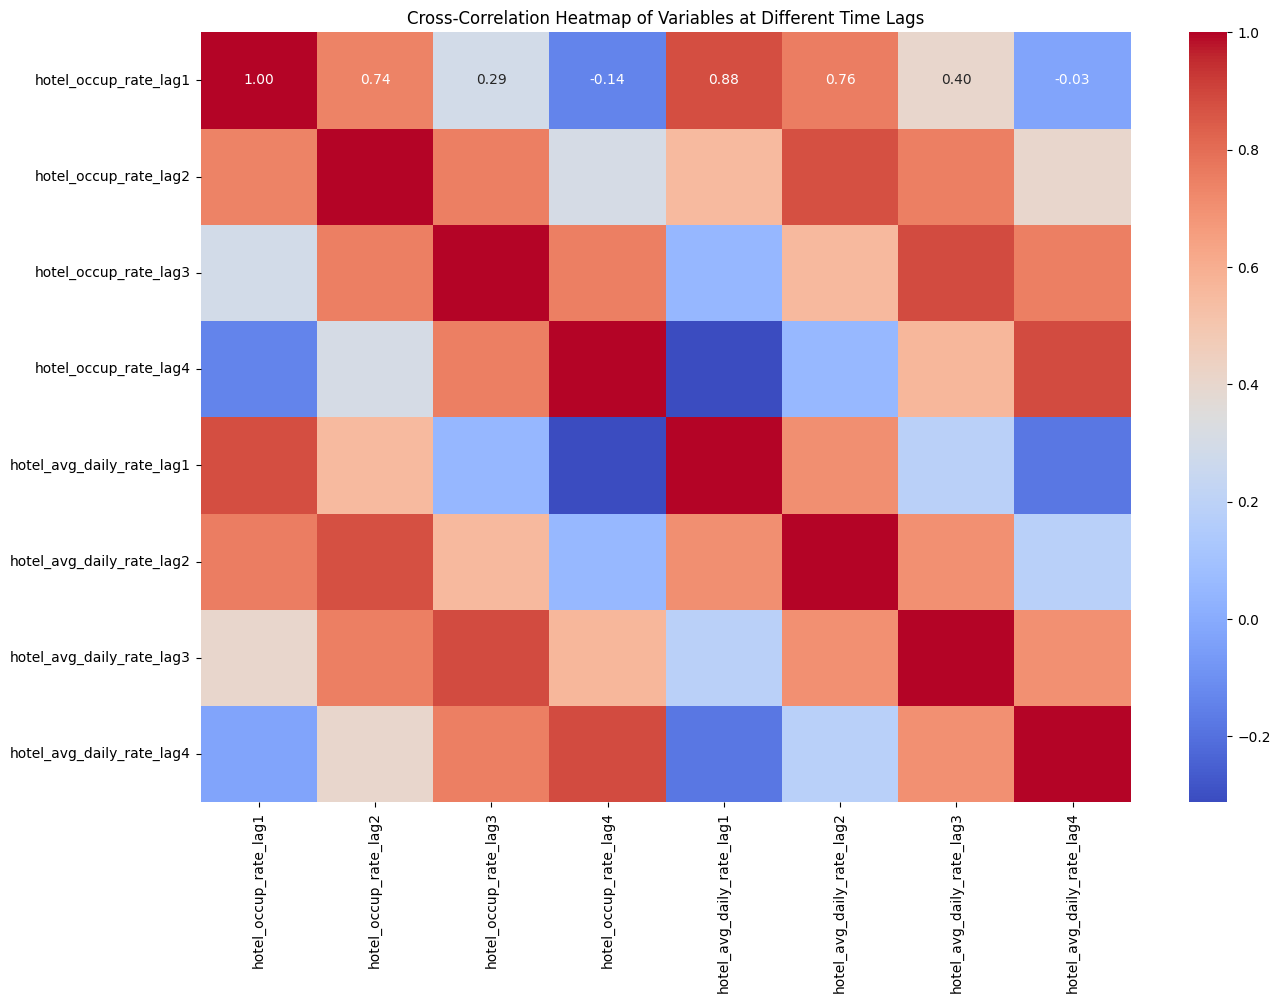

In [11]:
columns_of_interest = ['hotel_occup_rate', 'hotel_avg_daily_rate' ]
cross_corr = pd.DataFrame()
for col in columns_of_interest:
    for lag in range(1, lags + 1):
        cross_corr[f'{col}_lag{lag}'] = df[col].shift(-lag)
corr_matrix = cross_corr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cross-Correlation Heatmap of Variables at Different Time Lags')
plt.show()


#### This heatmap depicts Relationship Between Hotel Occupancy Rate and Hotel Average Daily Rate


## Performing impulse response function using VAR model to show how a shock or change in a variable affects itself in a system.

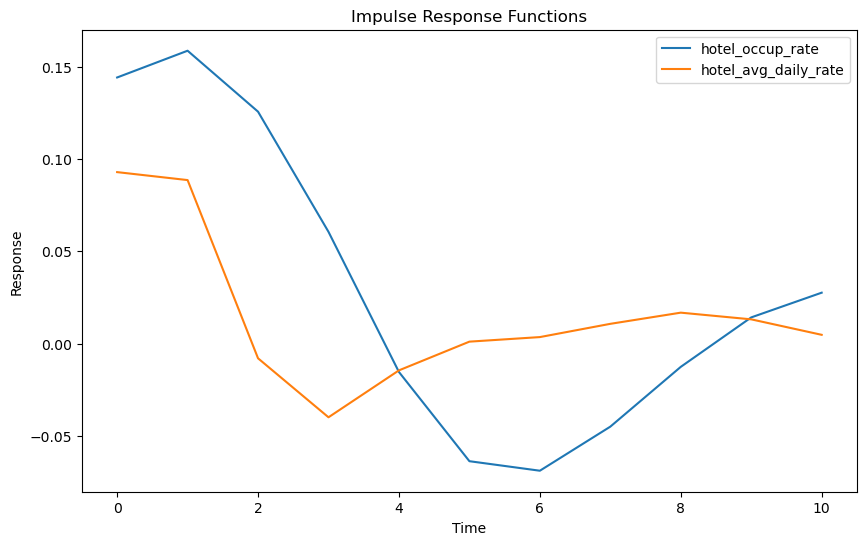

In [10]:
columns_of_interest = ['hotel_occup_rate', 'hotel_avg_daily_rate']
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())
df_normalized = normalize(df[columns_of_interest])
data_for_var = df_normalized.to_numpy()
var_model = VAR(data_for_var)
results = var_model.fit(maxlags=4, ic='aic')
num_periods = 10
plt.figure(figsize=(10, 6))
irf = results.irf(num_periods)
for i, column in enumerate(columns_of_interest):
    impulse_responses = irf.orth_irfs[:, i, i] 
    plt.plot(impulse_responses, label=column)
plt.title('Impulse Response Functions')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.show()


#### The plot generated by the code visualizes the impulse response functions for each variable over 10 periods. It shows how each variable responds to an impulse or shock in its own variable over time.A steeper increase or decrease in the response signifies a stronger impact or effect.

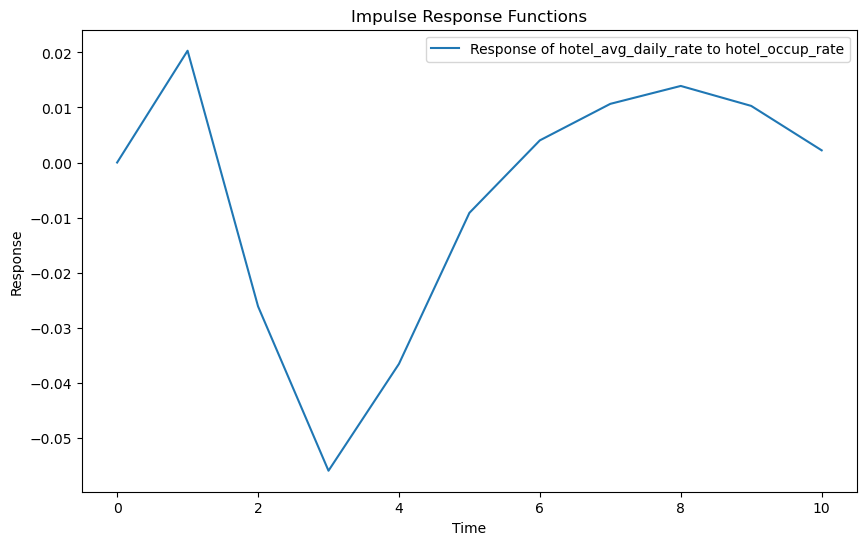

In [12]:
# Retrieve impulse responses for different relationships

impulse_responses_2 = irf.orth_irfs[:, columns_of_interest.index('hotel_occup_rate'), columns_of_interest.index('hotel_avg_daily_rate')]

# Plot multiple impulse response functions
plt.figure(figsize=(10, 6))

plt.plot(impulse_responses_2, label='Response of hotel_avg_daily_rate to hotel_occup_rate')


plt.title('Impulse Response Functions')
plt.xlabel('Time')
plt.ylabel('Response')
plt.legend()
plt.show()


#### Since the cross correlation depicted the relationships, plotted the response of hotel_avg_daily_rate to hotel_occup_rate, 

# Performed Granger causality test to determine if one variable has predictive power over another variable.

In [13]:
columns_of_interest = ['hotel_avg_daily_rate', 'hotel_occup_rate']
data_for_test = df[columns_of_interest]
max_lag = 4 
granger_test_result = grangercausalitytests(data_for_test, max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.5917 , p=0.0001  , df_denom=80, df_num=1
ssr based chi2 test:   chi2=17.2139 , p=0.0000  , df=1
likelihood ratio test: chi2=15.6427 , p=0.0001  , df=1
parameter F test:         F=16.5917 , p=0.0001  , df_denom=80, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.9879  , p=0.0016  , df_denom=77, df_num=2
ssr based chi2 test:   chi2=14.8832 , p=0.0006  , df=2
likelihood ratio test: chi2=13.6765 , p=0.0011  , df=2
parameter F test:         F=6.9879  , p=0.0016  , df_denom=77, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.7012 , p=0.0000  , df_denom=74, df_num=3
ssr based chi2 test:   chi2=35.1404 , p=0.0000  , df=3
likelihood ratio test: chi2=29.1884 , p=0.0000  , df=3
parameter F test:         F=10.7012 , p=0.0000  , df_denom=74, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.0316 , p=0.0000  , df_d

/Users/mohammadgulamafroza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


#### This implies that for all tested lag orders (1 to 4), the p-values are very small (close to 0), indicating strong evidence against the null hypothesis. This suggests that 'hotel_avg_daily_rate' Granger causes 'hotel_occup_rate' and vice versa, implying a statistically significant causal relationship between these two variables with different time lags up to the specified maximum lag order.

##### From above analysis, we can now hotel avg rates from hotel occupancy

## Plotted graphs to showcase how specific columns ('hotel_occup_rate', 'hotel_avg_daily_rate') change over time, against the time series data ('Year' and 'Month').

In [14]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))


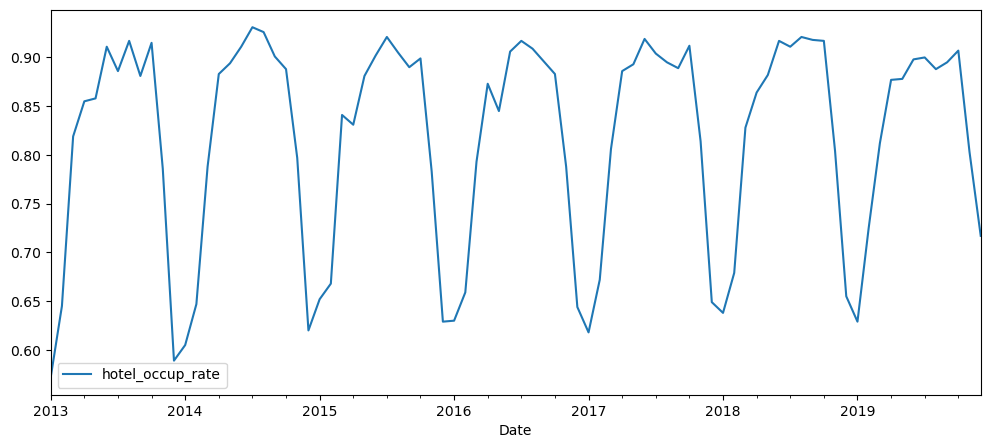

In [15]:
ax = df.plot(x='Date', y='hotel_occup_rate', figsize=(12,5))

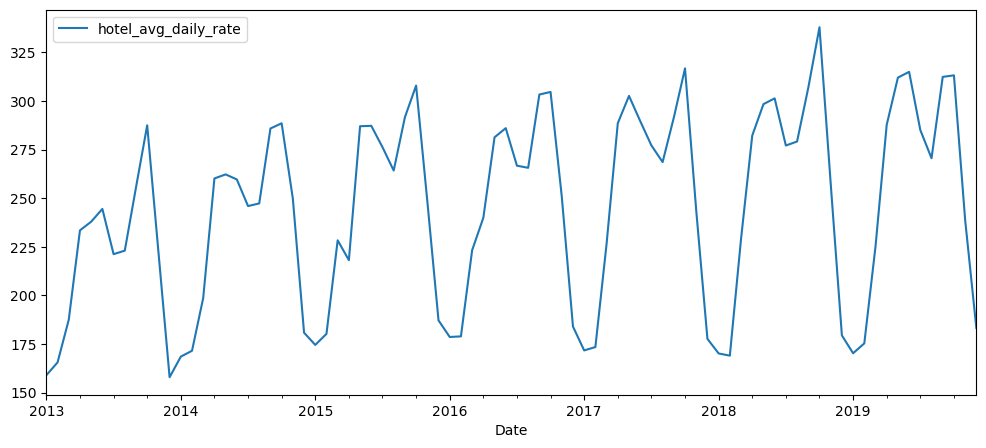

In [16]:
ax = df.plot(x='Date', y='hotel_avg_daily_rate', figsize=(12,5))

# Checking if the data is stationary or not

In [17]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
print("Hotel Occup Rate")
adf_test(df['hotel_occup_rate'])
print('----------')
print("Hotel Avg Daily Rate")
adf_test(df['hotel_avg_daily_rate'])

Hotel Occup Rate
Results of Dickey-Fuller Test:
Test Statistic                 -1.690633
p-value                         0.435945
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64
----------
Hotel Avg Daily Rate
Results of Dickey-Fuller Test:
Test Statistic                 -3.597105
p-value                         0.005817
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


#### Observing the test statistic, critical values and p-value, concluded that the variable Hotel_occup_rate is not stationary and hotel_avg_daily_rates is stationary.

# Performed cointegration test  to identify whether non-stationary time series variables creates a stationary series.

In [18]:
df.head(1)

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits,Date
0,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,80000000.0,313107,228,44,11,380000,405,534,134,2013-01-01


In [19]:
model1 = coint_johansen(df[['hotel_occup_rate', 'hotel_avg_daily_rate']], det_order=0, k_ar_diff=2)
eigenvalues_h = model1.eig
eigenvectors_h = model1.evec
trace_statistic_h = model1.lr1
critical_values_trace_h = model1.cvt 
max_eigenvalue_statistic_h = model1.lr2
critical_values_max_eigenvalue_h = model1.cvm
print('for hotel occupancy rate and hotel avg daily rate')
print("Eigenvalues:")
print(eigenvalues_h)
print("\nEigenvectors:")
print(eigenvectors_h)
print("\nTrace Statistic and Critical Values:")
print("Trace Statistic:", trace_statistic_h)
print("Critical Values for Trace Statistic:")
print(critical_values_trace_h)
print("\nMaximum Eigenvalue Statistic and Critical Values:")
print("Maximum Eigenvalue Statistic:", max_eigenvalue_statistic_h)
print("Critical Values for Maximum Eigenvalue Statistic:")
print(critical_values_max_eigenvalue_h)


for hotel occupancy rate and hotel avg daily rate
Eigenvalues:
[0.27872887 0.13232133]

Eigenvectors:
[[ 1.15148177e+01 -2.62091367e+01]
 [ 4.68328382e-03  6.56426674e-02]]

Trace Statistic and Critical Values:
Trace Statistic: [37.96259331 11.49663999]
Critical Values for Trace Statistic:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Maximum Eigenvalue Statistic and Critical Values:
Maximum Eigenvalue Statistic: [26.46595332 11.49663999]
Critical Values for Maximum Eigenvalue Statistic:
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [20]:
# Significance level (adjust as needed)
significance_level = 0.05  # For example, 5% significance level

# Get the critical values corresponding to the desired significance level

trace_statistic_threshold_h = critical_values_trace_h[:, 1]  # Critical values for at least one cointegrating relationship
max_eigenvalue_threshold_h = critical_values_max_eigenvalue_h[:, 1]  # Critical values for at least one cointegrating relationship

# Checking for cointegration based on trace statistic

trace_cointegration_check_h = all(trace_statistic_h > trace_statistic_threshold_h)
# Checking for cointegration based on maximum eigenvalue statistic

max_eigenvalue_cointegration_check_h = all(max_eigenvalue_statistic_h > max_eigenvalue_threshold_h)
# Outputting the cointegration check results
if trace_cointegration_check_h and max_eigenvalue_cointegration_check_h:
    print("Cointegration is present at", significance_level * 100, "% significance level between hotel_occup_rate and hotel_avg_daily_rate.")
else:
    print("No cointegration at", significance_level * 100, "% significance level between hotel_occup_rate and hotel_avg_daily_rate.")


Cointegration is present at 5.0 % significance level between hotel_occup_rate and hotel_avg_daily_rate.


this was assessed to check whether the 'hotel_occup_rate' and hotel_avg_daily_rate' variables have a stable long-term relationship, which can influence the decision to model them together using an ARIMA framework with one as an exogenous variable for the other.







# Transform non stationary data to stationary data and check if the transformation worked!

for hotel occup


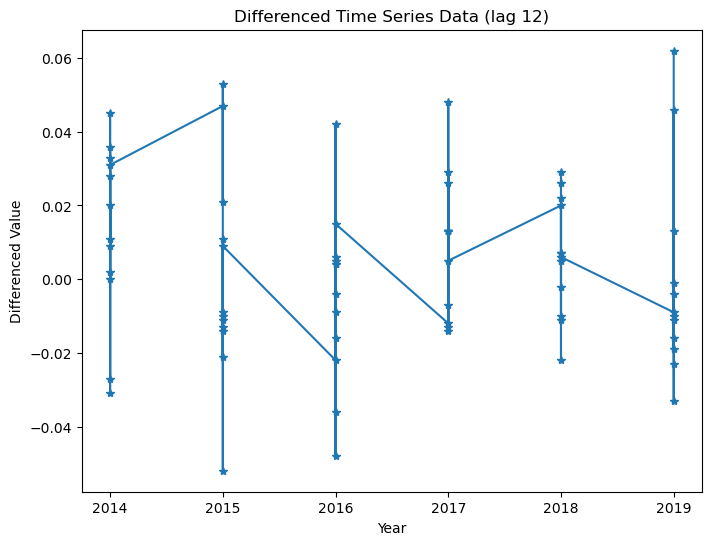

ADF Statistic: -2.950936274517291
p-value: 0.03973736660959866
Critical Values:
   1%: -3.5443688564814813
   5%: -2.9110731481481484
   10%: -2.5931902777777776
The time series is likely stationary (reject the null hypothesis)
for hotel average rates


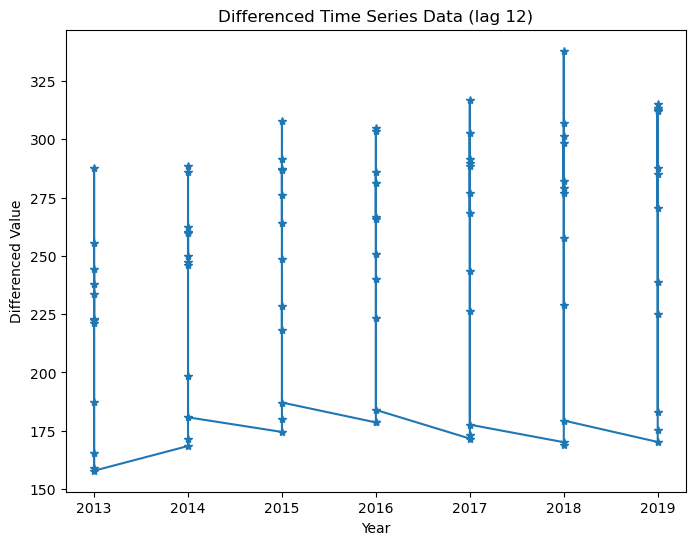

ADF Statistic: -3.5971047757627344
p-value: 0.005816620067413758
Critical Values:
   1%: -3.524624466842421
   5%: -2.9026070739026064
   10%: -2.5886785262345677
The time series is likely stationary (reject the null hypothesis)


In [22]:
df['stationary_data_occup'] = df['hotel_occup_rate'] - df['hotel_occup_rate'].shift(12)
#df['stationary_data_rates'] = df['hotel_avg_daily_rate'] - df['hotel_avg_daily_rate'].shift(12)
# Plot the differenced time series data
    
print('for hotel occup')
plt.figure(figsize=(8, 6))
plt.plot(df['Year'], df['stationary_data_occup'], marker='*', linestyle='-')
plt.title('Differenced Time Series Data (lag 12)')
plt.xlabel('Year')
plt.ylabel('Differenced Value')
plt.show()

# Perform Augmented Dickey-Fuller test
result2 = adfuller(df['stationary_data_occup'].dropna(), autolag='AIC')

# Extract and print the test results
adf_statistic_o = result2[0]
p_value_o = result2[1]
critical_values_o = result2[4]

print(f'ADF Statistic: {adf_statistic_o}')
print(f'p-value: {p_value_o}')
print('Critical Values:')
for key, value in critical_values_o.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value_o <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis)')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis)')
    
print('for hotel average rates')
plt.figure(figsize=(8, 6))
#plt.plot(df['Year'], df['stationary_data_rates'], marker='*', linestyle='-')
plt.plot(df['Year'], df['hotel_avg_daily_rate'], marker='*', linestyle='-')

plt.title('Differenced Time Series Data (lag 12)')
plt.xlabel('Year')
plt.ylabel('Differenced Value')
plt.show()

# Perform Augmented Dickey-Fuller test
#result3 = adfuller(df['stationary_data_rates'].dropna(), autolag='AIC')
result3 = adfuller(df['hotel_avg_daily_rate'].dropna(), autolag='AIC')
# Extract and print the test results
adf_statistic_r = result3[0]
p_value_r = result3[1]
critical_values_r = result3[4]

print(f'ADF Statistic: {adf_statistic_r}')
print(f'p-value: {p_value_r}')
print('Critical Values:')
for key, value in critical_values_r.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value_r <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis)')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis)')

In [23]:

#df['stationary_data_flights']=df['stationary_data_flights'].dropna()

df=df[13:]


ARIMA model on hotel_occup_rate and hotel_avg_daily_rate

/var/folders/c2/0kbs87z918ld0pvj_8jllqlr0000gn/T/ipykernel_47233/1958745410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
/Users/mohammadgulamafroza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mohammadgulamafroza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/mohammadgulamafroza/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: 

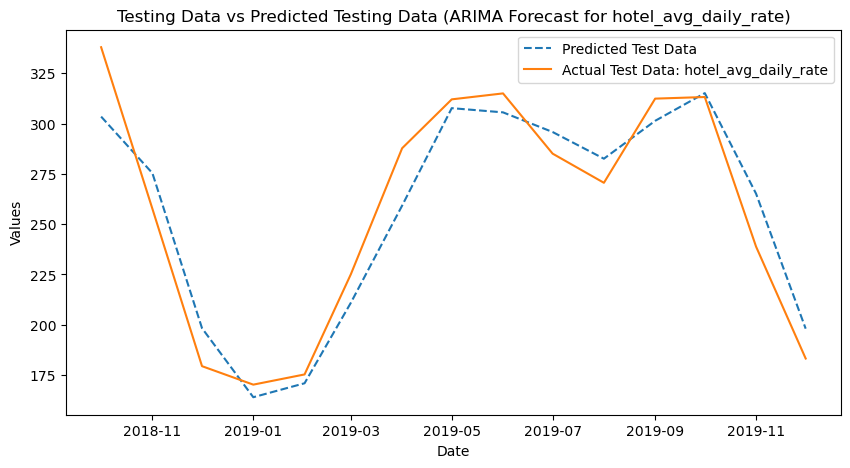

In [24]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df.set_index('Date', inplace=True)
model = coint_johansen(df[['stationary_data_occup', 'hotel_avg_daily_rate']], det_order=0, k_ar_diff=2)
coint_result = model.lr1
columns_of_interest = ['stationary_data_occup', 'hotel_avg_daily_rate']
train_size = int(len(df) * 0.8) 
train_data = df[columns_of_interest].iloc[:train_size]
test_data = df[columns_of_interest].iloc[train_size:]
p = 12  # AR order
d = 0  # Differencing order
q = 12  # MA order
arima_model = ARIMA(train_data['hotel_avg_daily_rate'], exog=train_data['stationary_data_occup'], order=(p, d, q))
arima_result = arima_model.fit()
test_predictions = arima_result.forecast(steps=len(test_data), exog=test_data['stationary_data_occup'])
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_predictions, label='Predicted Test Data', linestyle='--')
plt.plot(test_data.index, test_data['hotel_avg_daily_rate'], label='Actual Test Data: hotel_avg_daily_rate')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Testing Data vs Predicted Testing Data (ARIMA Forecast for hotel_avg_daily_rate)')
plt.show()


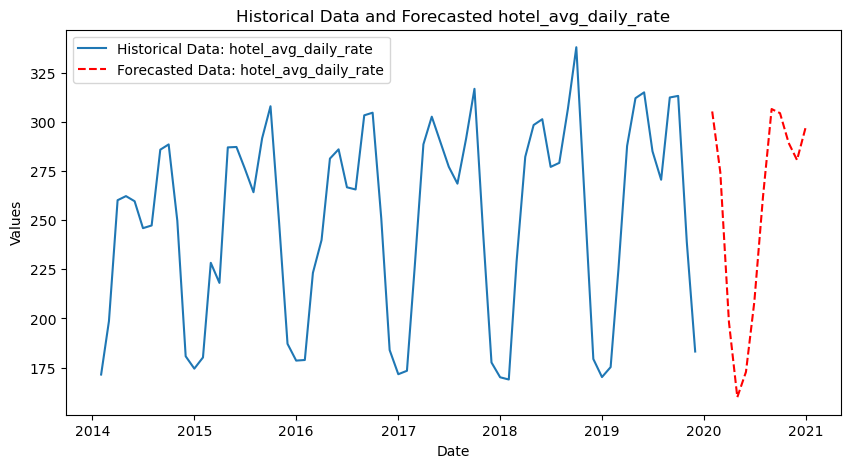

In [25]:
forecast_steps = 12
last_20_hotel_occup = df['stationary_data_occup'].iloc[-20:]  # Retrieve the last 20 values
future_exog = last_20_hotel_occup.tolist() * (forecast_steps // 20)  # Repeat the last 20 values based on forecast steps

remaining_steps = forecast_steps % 20
future_exog += last_20_hotel_occup.tolist()[:remaining_steps]
future_forecast = arima_result.forecast(steps=forecast_steps, exog=future_exog)
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['hotel_avg_daily_rate'], label='Historical Data: hotel_avg_daily_rate')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Historical Data and Forecasted hotel_avg_daily_rate')
plt.plot(future_dates, future_forecast, label='Forecasted Data: hotel_avg_daily_rate', linestyle='--', color='red')
plt.legend()
plt.show()
